# Procesamiento en Python acerca del Dataframe 2: Catálogo de películas (catalogo_peliculas.csv)

In [23]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msmo
from statistics import multimode, mean, median
import math

## Importar datos del archivo .csv

In [24]:
df = pd.read_csv("..\\dataset\\catalogo_peliculas.csv", index_col=0)
df.head(10)

,title,film_duration,description,special_features,rating,rental_duration,rental_rate,replacement_cost,language,category,total_copies,is_long_film
film_id,,,,,,,,,,,,
1,academy dinosaur,86,a epic drama of a feminist and a mad scientist...,"deleted scenes,behind the scenes",PG,6,0.99,20.99,english,documentary,8,no
2,ace goldfinger,48,a astounding epistle of a database administrat...,"trailers,deleted scenes",G,3,4.99,12.99,english,horror,3,no
3,adaptation holes,50,a astounding reflection of a lumberjack and a ...,"trailers,deleted scenes",NC-17,7,2.99,18.99,english,documentary,4,no
4,affair prejudice,117,a fanciful documentary of a frisbee and a lumb...,"commentaries,behind the scenes",G,5,2.99,26.99,english,horror,7,no
5,african egg,130,a fast-paced documentary of a pastry chef and ...,deleted scenes,G,6,2.99,22.99,english,family,3,yes
6,agent truman,169,a intrepid panorama of a robot and a boy who m...,deleted scenes,PG,3,2.99,17.99,english,foreign,6,yes
7,airplane sierra,62,a touching saga of a hunter and a butler who m...,"trailers,deleted scenes",PG-13,6,4.99,28.99,english,comedy,5,no
8,airport pollock,54,a epic tale of a moose and a girl who must con...,trailers,R,6,4.99,15.99,english,horror,4,no
9,alabama devil,114,a thoughtful panorama of a database administra...,"trailers,deleted scenes",PG-13,3,2.99,21.99,english,horror,5,no


# Comprobamos que los tipos de datos que tiene nuestra tabla son correctos

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 1 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             958 non-null    object 
 1   film_duration     958 non-null    int64  
 2   description       958 non-null    object 
 3   special_features  958 non-null    object 
 4   rating            958 non-null    object 
 5   rental_duration   958 non-null    int64  
 6   rental_rate       958 non-null    float64
 7   replacement_cost  958 non-null    float64
 8   language          958 non-null    object 
 9   category          958 non-null    object 
 10  total_copies      958 non-null    int64  
 11  is_long_film      958 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 97.3+ KB


# Ver valores nulos

In [26]:
df.isna().sum()

title               0
film_duration       0
description         0
special_features    0
rating              0
rental_duration     0
rental_rate         0
replacement_cost    0
language            0
category            0
total_copies        0
is_long_film        0
dtype: int64

# Creamos una copia de nuestro Dataframe para trabajar y modificar.

In [27]:
df_copy = df.copy()

# Generación de datos analiticos (media, moda y mediana) y gráficos para cada uno de ellos

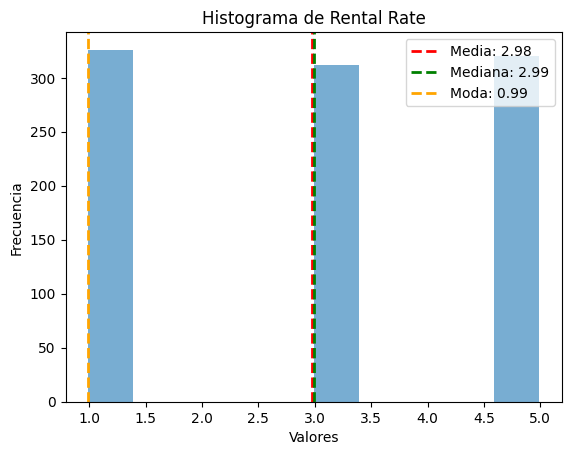

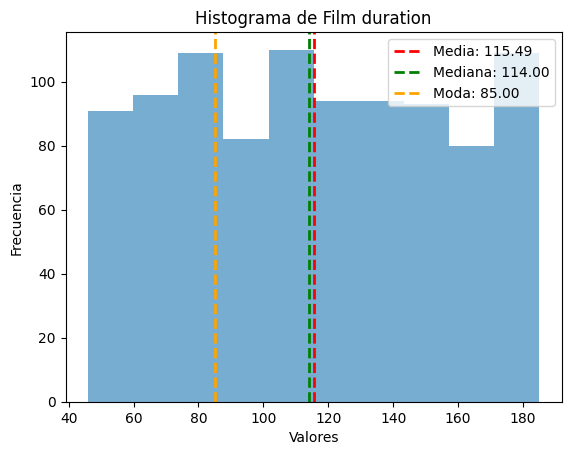

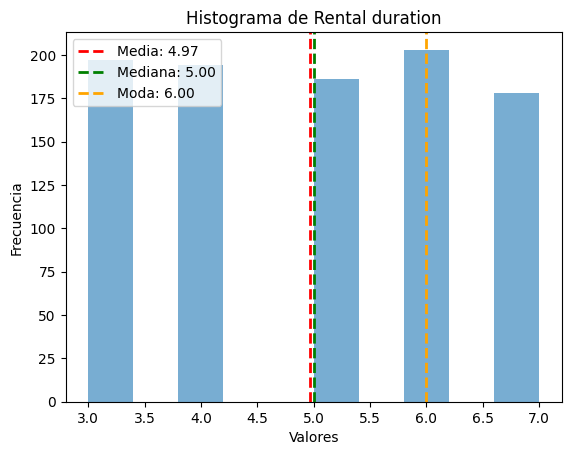

In [28]:
# Lista de columnas del dataframe
columnas = ['rental_rate', 'film_duration', 'rental_duration']
nombres = ['Rental Rate', 'Film duration', 'Rental duration']

for col, nombre in zip(columnas, nombres):

    # Comprobamos que no tenemos valores nulos y en el caso de tenerlo eliminarlo
    datos = df_copy[col].dropna()

    # Sacamos los datos de media. mediana y moda
    media = datos.mean()
    mediana = datos.median()
    moda = datos.mode().iloc[0]   # tomar solo 1 moda y no multimoda

    # Creamos la gráfica (en este caso un histograma)
    plt.hist(datos, bins=10, alpha=0.6)

    # Agrega una linea discontinua vertical por cada valor que queremos mostrar en nuestro grafico
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {moda:.2f}')

    # Damos valores al titulo, eje x e y y una leyenda a nuestra gráfica y lo mostramos.
    plt.title(f"Histograma de {nombre}")
    plt.xlabel("Valores")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

# Interpretación de gráficas.

## Rental rate: precio de alquiler de las peliculas

##### El precio de alquiler (Rental Rate) sigue una distribución claramente discreta, ya que solo toma tres valores: 0.99$, 2.99$ y 4.99$. Esto indica que la plataforma utiliza un sistema de tarifas fijas.

##### La mayoría de los alquileres se concentran en el precio más bajo (0.99$), lo que convierte a este valor en la moda. Este hecho puede reflejar una estrategia comercial orientada a ofrecer la mayor parte del catálogo a un precio accesible.

##### Por otro lado, la media (~2.98) y la mediana (~2.99) se encuentran prácticamente en el mismo punto, lo que indica que los datos están distribuidos de forma simétrica alrededor del precio intermedio. No hay valores extremos que generen sesgo.

##### La presencia de tres picos bien definidos revela una distribución multimodal, típica en sistemas de precios categorizados. Esto muestra que los valores no se dispersan de manera continua, sino que forman grupos concentrados en tarifas específicas

## Film duration

##### La duración de las películas presenta una distribución continua, lo que se refleja en el histograma mediante una cobertura casi completa del rango de valores. Esto indica que las películas tienen una variedad notable de duraciones, que van aproximadamente desde los 45 minutos hasta los 185 minutos. No existen saltos o límites rígidos, lo que sugiere que la duración no está condicionada por categorías discretas, sino que puede tomar prácticamente cualquier valor dentro de ese intervalo.

##### La moda, situada en torno a los 85 minutos, revela que este es el valor de duración más frecuente en el catálogo. Este valor puede considerarse relativamente bajo en comparación con la duración típica de un largometraje estándar (alrededor de 90–120 minutos), lo que podría indicar una mayor presencia de películas cortas, producciones independientes, documentales o contenido de bajo presupuesto.

##### Por otro lado, la media y la mediana tienen valores muy similares, lo que sugiere que la distribución es aproximadamente simétrica y no está sesgada hacia duraciones excesivamente cortas o largas. Esto implica que, aunque existe variabilidad, la mayor parte de las películas tienden a agruparse alrededor de una duración central bien definida.

##### En conjunto, estas observaciones indican que el catálogo ofrece una amplia diversidad de duraciones, con una concentración moderada en películas relativamente cortas y sin presencia de valores extremos que distorsionen la distribución global.

## Rental duration

##### La distribución del tiempo de alquiler de las películas se presenta en intervalos, por lo que, al igual que en la primera gráfica, estamos ante una distribución discreta.

##### En este caso, la moda se sitúa por encima de la media y la mediana, siendo 6 días el valor más frecuente de duración del alquiler. Esto indica que la mayoría de los clientes suelen mantener la película durante ese periodo.

##### Tanto la media como la mediana muestran valores muy cercanos entre sí y se ubican aproximadamente en el centro de la distribución. Esta relación sugiere que no existen valores atípicos significativos que generen un sesgo notable en los datos.

##### En conjunto, la forma de la distribución apunta a un patrón relativamente estable en el comportamiento de los usuarios: parece existir un rango de días preferido para alquilar las películas, lo que podría responder a hábitos de consumo o a políticas del servicio que influyen en la duración típica del alquiler.

# Generar gráfica para diferenciar las peliculas de <120 y >120

<function matplotlib.pyplot.show(close=None, block=None)>

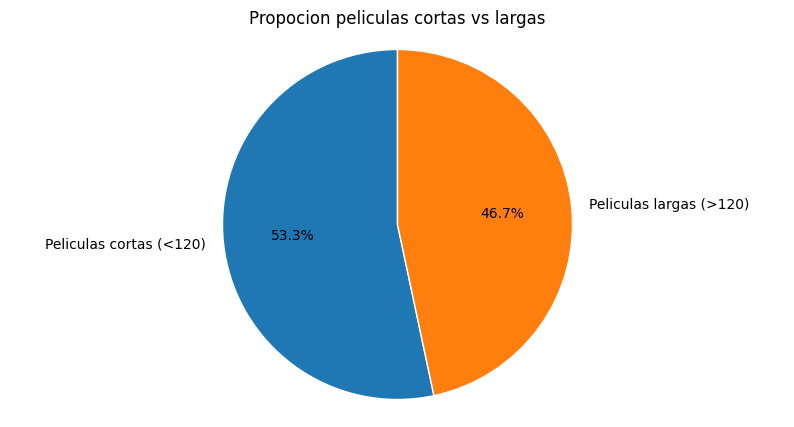

In [29]:
values = df_copy['is_long_film'].value_counts()
labels = ['Peliculas cortas (<120)', 'Peliculas largas (>120)']

plt.figure(figsize=(10, 5))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Propocion peliculas cortas vs largas")
plt.axis('equal')
plt.show

##### Los resultados muestran que el 53.3% de las películas tienen una duración inferior a 120 minutos, mientras que el 46.7% superan ese umbral. Aunque la diferencia no es muy amplia, sí se aprecia una ligera predominancia de películas cortas dentro del catálogo.

##### Esta distribución sugiere que el conjunto de datos está ligeramente inclinado hacia producciones con un formato más estándar o compacto, que suele ser habitual en películas comerciales o independientes. Por su parte, el 46.7% de películas largas indica también una presencia considerable de títulos más extensos, lo que refleja variedad en la oferta y un equilibrio razonable entre ambas duraciones.

##### En conjunto, se puede concluir que no existe un dominio fuerte de un tipo sobre el otro, pero sí una tendencia moderada hacia las películas de menor duración.

# Generar datos y gráfico para peliculas en función de su género (columna category)

## Formato de porcentajes.

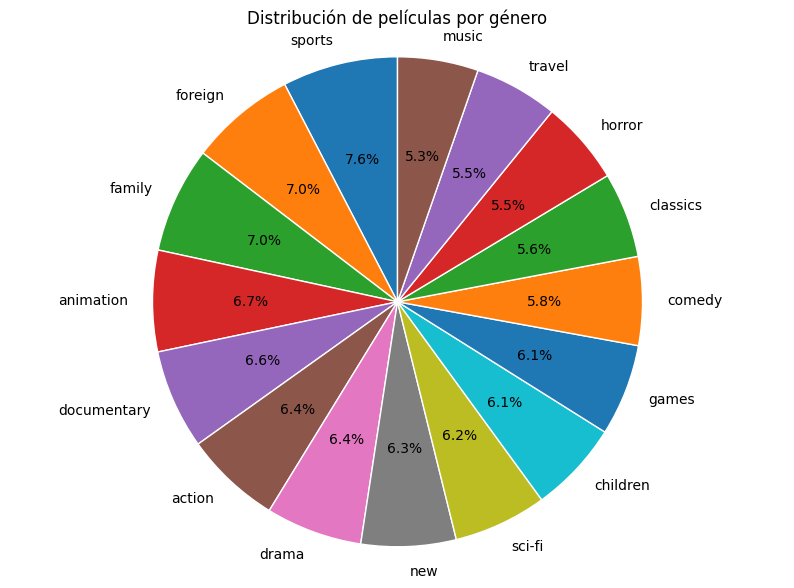

In [30]:
# Contar cuántas películas hay por género
genre_counts = df_copy['category'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10,7))
plt.pie(
    genre_counts.values,
    labels=genre_counts.index,
    autopct='%1.1f%%',   # Muestra el porcentaje
    startangle=90,       
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de películas por género")
plt.axis('equal') 
plt.show()

## Formato de cantidad

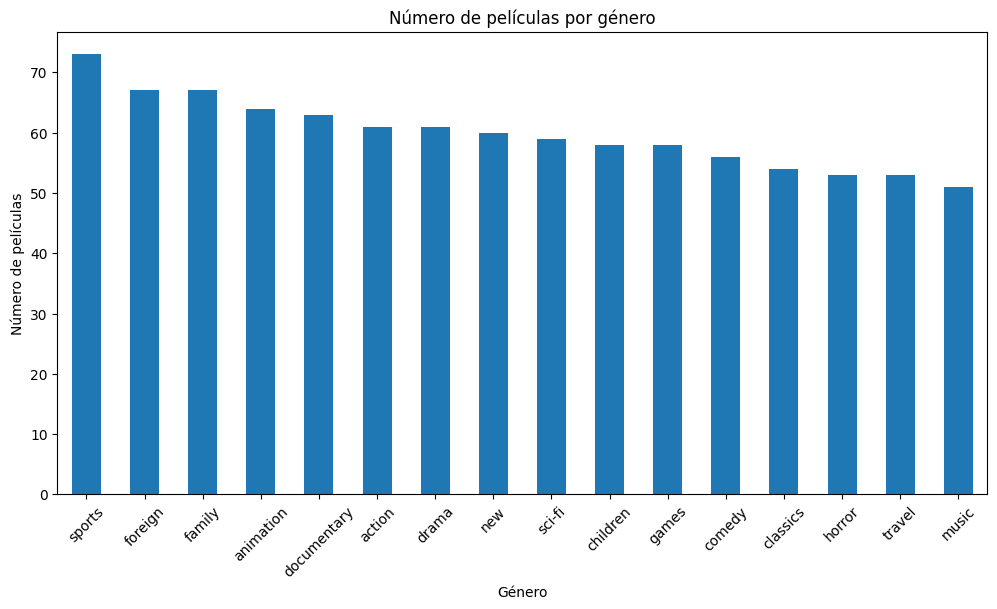

In [31]:
df_copy['category'].value_counts().plot(kind='bar', figsize=(12,6))

plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.title("Número de películas por género")
plt.xticks(rotation=45)
plt.show()


##### El catálogo de películas cuenta con 16 géneros distintos, lo que indica una amplia diversidad de opciones para los usuarios. Esta variedad permite cubrir distintos gustos y preferencias, desde acción, comedia y drama, hasta géneros más específicos como deportes o documentales.

##### Al observar la distribución, se aprecia que la categoría de deportes es la más frecuente. Esto puede indicar varias cosas:

#####   1. Preferencias de los usuarios: Tal vez las películas de deportes son más demandadas, por lo que se ha priorizado su inclusión en el catálogo.

#####   2. Estrategia del catálogo: Es posible que la plataforma busque diferenciarse ofreciendo más títulos en un género concreto que atrae a un público específico.

#####   3. Disponibilidad de contenido: Algunos géneros, como deportes, pueden ser más fáciles de adquirir o producir, lo que aumenta su representación.

##### A pesar de que la categoría de deportes destaca, las demás categorías también están bien representadas, lo que sugiere un equilibrio en la oferta. Esto es positivo, ya que un catálogo muy concentrado en un solo género podría limitar las opciones del cliente y reducir su interés general.

##### En conjunto, la distribución de géneros muestra un catálogo equilibrado con un ligero énfasis en deportes, proporcionando tanto diversidad como algunas opciones más especializadas para atraer a audiencias concretas.

# Gráfico para ver cual es el rating de las peliculas en formato porcentaje.

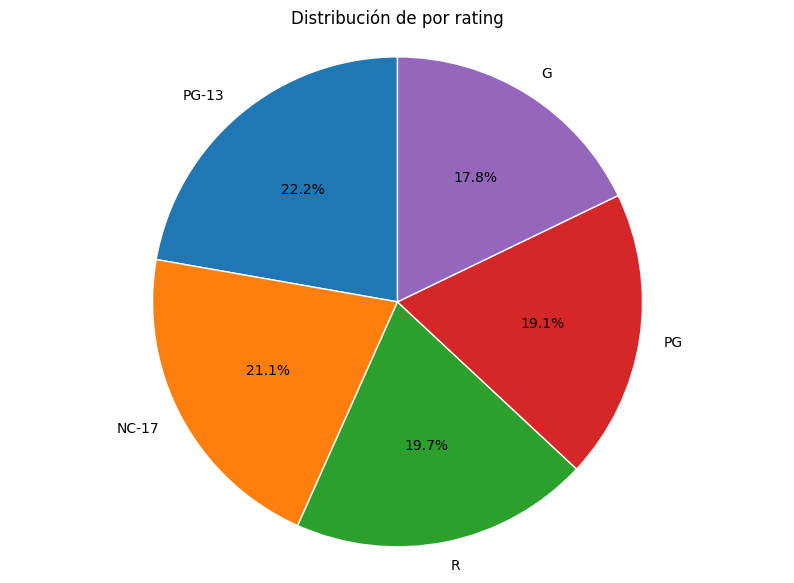

In [32]:
# Contar cuántas películas hay por género
rating_count = df_copy['rating'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10,7))
plt.pie(
    rating_count.values,
    labels=rating_count.index,
    autopct='%1.1f%%',   # Muestra el porcentaje
    startangle=90,       
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Distribución de por rating")
plt.axis('equal') 
plt.show()

##### Vemos que la distribución de los porcentajes estan muy repartidos y tienen valores similares con poca diferencia entre los distintos rating.

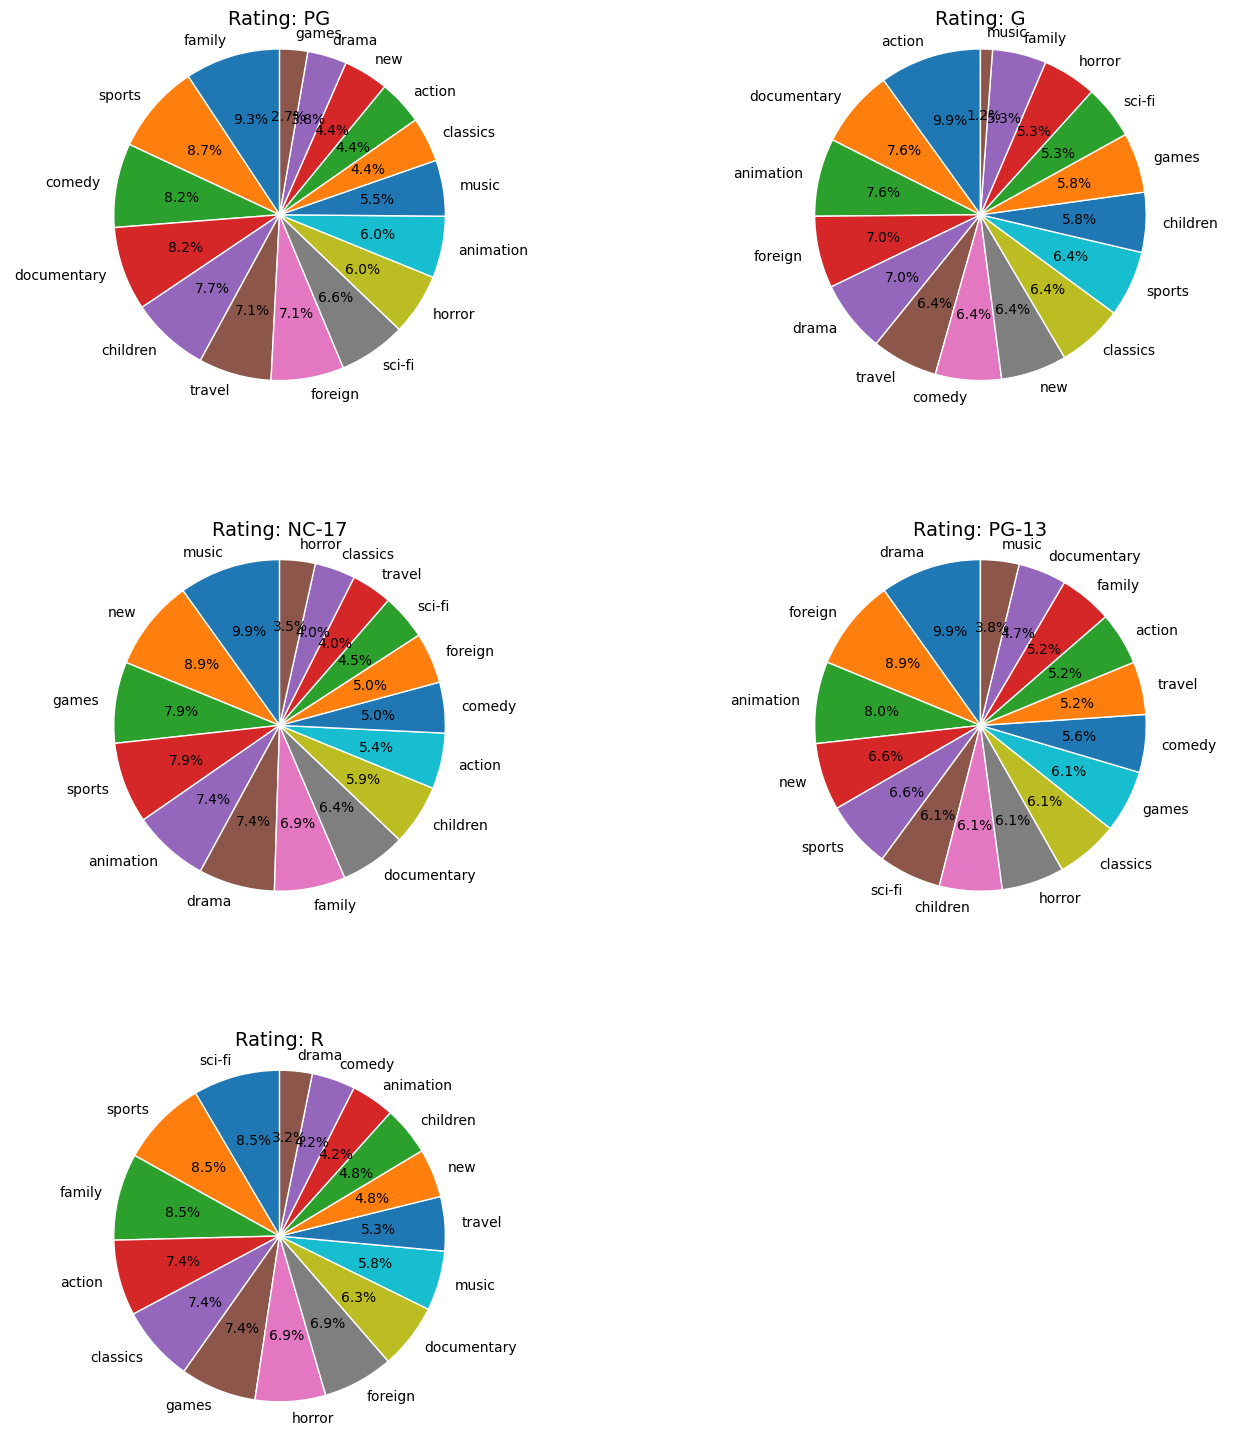

In [33]:
# Obtener todos los ratings únicos
ratings = df_copy['rating'].unique()
num_ratings = len(ratings)

# Elegir cuántos gráficos por fila
cols = 2
rows = math.ceil(num_ratings / cols)

# Configurar la figura
fig, axes = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))

# Aplanar axes para iterar fácilmente
axes = axes.flatten()

# Crear un pie chart para cada rating
for ax, rating in zip(axes, ratings):
    movies_rating = df_copy[df_copy['rating'] == rating]
    category_counts = movies_rating['category'].value_counts()
    
    ax.pie(
        category_counts.values,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'white'}
    )
    ax.set_title(f"Rating: {rating}", fontsize=14)
    ax.axis('equal')

# Ocultar cualquier subplot extra si el número de ratings no llena la cuadrícula
for i in range(len(ratings), len(axes)):
    axes[i].axis('off')

# Ajustar el espacio entre filas y columnas
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # hspace aumenta el espacio vertical, wspace el horizontal

plt.show()

### PG:
##### El rating PG indica que las películas son aptas para todos los públicos, aunque se sugiere la supervisión de un adulto debido a la presencia de alguna escena que puede requerir control parental.
##### Al analizar la distribución de las categorías dentro de este rating, se observa que las tres principales son Family, Sports y Comedy. Esto refleja que el catálogo PG está orientado principalmente a contenido familiar y entretenimiento ligero, adecuado para un público amplio y jóvenes.
##### Aunque categorías como Comedy son predominantes, las diferencias entre las principales categorías no son demasiado grandes, lo que sugiere una distribución relativamente equilibrada entre los géneros más populares dentro de este rating. Esto permite ofrecer variedad a los espectadores sin concentrarse excesivamente en un solo tipo de contenido.
##### Por otro lado, las categorías con menor representación, como Games, Drama y New, están más orientadas a un público adulto o a temáticas específicas, por lo que es lógico que tengan menor presencia en el segmento PG.
##### En conjunto, el análisis muestra que el catálogo PG está bien balanceado hacia el público familiar, con una clara preferencia por categorías ligeras y de entretenimiento, mientras que las categorías menos populares reflejan contenidos más especializados o dirigidos a audiencias adultas.

### G:
##### El rating G indica que las películas son aptas para todos los públicos, sin restricciones de edad, y suelen ser aptas para ver en familia.
##### Al analizar la distribución de categorías dentro de este rating, se observa que las películas más frecuentes pertenecen a Action, Documentary y Animation. Aunque estas categorías no destacan tanto como las principales de otros ratings, representan aproximadamente el 14% del total de películas disponibles, lo que indica que el contenido G está enfocado principalmente a ofrecer entretenimiento familiar y accesible para todas las edades.
##### Por otro lado, las categorías menos frecuentes dentro de este rating son Music y Horror, géneros que suelen resultar menos atractivos o menos apropiados para un público infantil y familiar. Esto refuerza la idea de que la selección de películas G está cuidadosamente orientada a un contenido seguro, ligero y de amplio atractivo.
##### En conjunto, el análisis sugiere que el catálogo de películas G es variado pero centrado en la familia, priorizando categorías que garantizan diversión y entretenimiento para todos los públicos, mientras que los géneros más específicos o de menor interés para niños están menos representados.

# NC-17:
##### El rating NC-17 indica que las películas no son aptas para personas menores de 17 años, por lo que están dirigidas a un público adulto.

##### Al observar la distribución de categorías dentro de este rating, las más frecuentes son Music, New y Game. Estas categorías reflejan contenidos más especializados y orientados a intereses o hobbies propios de un público adulto, que suele tener mayor capacidad de análisis y criterio para elegir qué tipo de entretenimiento consumir.

##### Por otro lado, las categorías menos representadas son Horror, Classics y Travel, que aparecen en menor cantidad dentro del catálogo NC-17. Esto puede indicar que estos géneros son más limitados o repetitivos en este segmento, lo que reduce la variedad disponible y, en consecuencia, la elección para los usuarios que buscan este tipo de películas.

##### En conjunto, el análisis sugiere que el catálogo NC-17 está orientado a intereses adultos y especializados, con una oferta más limitada en ciertas categorías, lo que puede influir en la demanda y en la diversidad de opciones para los espectadores de este rating.

# PG-13:

##### El rating PG-13 advierte a los padres que el contenido puede no ser apto para niños menores de 13 años, orientándose principalmente a un público adolescente.

##### Al analizar la distribución de categorías dentro de este rating, las más alquiladas son Foreign, Drama y Animation. Esto sugiere que los adolescentes y jóvenes muestran interés por películas que combinan narrativa más elaborada (Drama), contenido internacional o culturalmente diverso (Foreign) y entretenimiento animado más maduro (Animation), adaptado a su edad y preferencias. Este enfoque indica que el catálogo PG-13 busca equilibrar diversión con temáticas que atraen a un público en transición de la niñez a la adolescencia.

##### Por otro lado, las categorías menos populares en este rating son Music, Documentary y Family. Estas categorías, típicamente más orientadas a un público infantil o a contenido educativo, no se alinean con los intereses de los adolescentes, lo que explica su menor demanda.

##### En conjunto, el análisis muestra que el catálogo PG-13 está estratégicamente diseñado para captar la atención de un público adolescente, ofreciendo una combinación de géneros atractivos para su edad, mientras que las categorías enfocadas a niños o a contenidos educativos tienen menor relevancia en este segmento.

# R
##### El rating R indica que las películas están restringidas a mayores de 17 años, aunque los menores pueden acceder bajo supervisión de sus padres. Este segmento está dirigido a un público adulto o adolescente mayor, que busca contenidos con temáticas más complejas o maduras.

##### Al analizar la distribución de categorías dentro de este rating, las más frecuentes son Sci-Fi, Sports y Family.

##### La categoría Sci-Fi destaca porque muchas películas de ciencia ficción abordan temáticas complejas o adultas, como dilemas éticos, violencia o ciencia avanzada, lo que atrae a un público más maduro.

##### Sports y Family en este contexto probablemente incluyen películas con historias de superación, deportes competitivos o dinámicas familiares con matices más serios, adaptadas a un público adulto o adolescente mayor.

##### Por otro lado, las categorías menos frecuentes son Drama, Comedy y Animation, géneros que, en el contexto del rating R, pueden tener menor demanda porque suelen estar más orientados a públicos jóvenes, entretenimiento ligero o contenido familiar que no requiere restricción de edad. Esto refleja que los usuarios que consumen contenido R buscan principalmente experiencias más intensas o especializadas.

##### En conjunto, la distribución de categorías muestra que el catálogo R está diseñado para ofrecer contenido maduro y temáticamente diverso, con una clara orientación hacia géneros que permiten explorar ideas más complejas o intensas, mientras que las categorías más ligeras o familiares tienen menor representación.

# Detectar outliers

## Colummna "film_duration"

## Calculamos los límites y los percentiles

In [34]:
# Cálculo de límites
Q1 = df_copy['film_duration'].quantile(0.25)
Q3 = df_copy['film_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

## Generamos el gráfico 

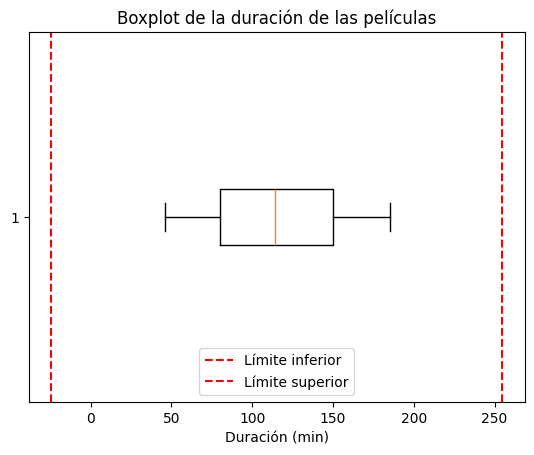

In [35]:
# Boxplot horizontal
plt.boxplot(df_copy['film_duration'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Duración (min)")
plt.title("Boxplot de la duración de las películas")
plt.legend()
plt.show()

##### Como podemos ver dentro de nuestro gráfico generado para film_duration no encontramos ningún outlier, todo se encuentra dentro de un rango normal dentro de nuestros datos. Por lo que no hay ningún dato que pueda alterar las métricas y datos analizados anteriormente con referencia a la duración de las peliculas.

## Columna "rental_rate"

In [36]:
# Cálculo de límites
Q1 = df_copy['rental_rate'].quantile(0.25)
Q3 = df_copy['rental_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

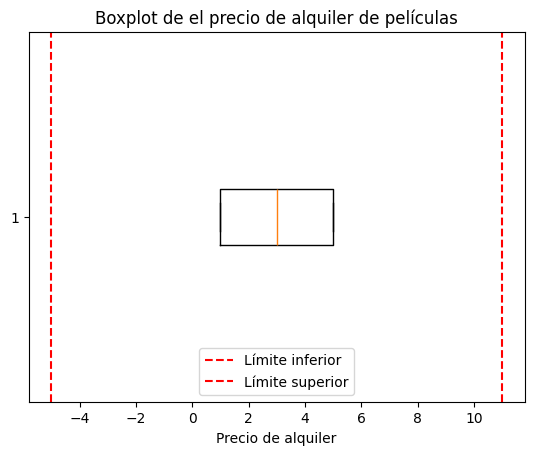

In [37]:
# Boxplot horizontal
plt.boxplot(df_copy['rental_rate'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Precio de alquiler")
plt.title("Boxplot de el precio de alquiler de películas")
plt.legend()
plt.show()

##### En la gráfica observamos que algunos valores se encuentran en el límite inferior del boxplot. Esto se debe a que muchos de los precios de alquiler, en función de la duración, tienen un importe de 0,99. Esto indica que, dependiendo del tiempo de alquiler, los valores pueden situarse tanto por debajo como por encima del rango intercuartílico; de hecho, si la duración del alquiler es elevada, el precio podría superar incluso el límite superior del boxplot.
##### Aun así, no se identifican valores atípicos que alteren las estadísticas previamente analizadas.

## Columna "rental_duration"

In [38]:
# Cálculo de límites
Q1 = df_copy['rental_duration'].quantile(0.25)
Q3 = df_copy['rental_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

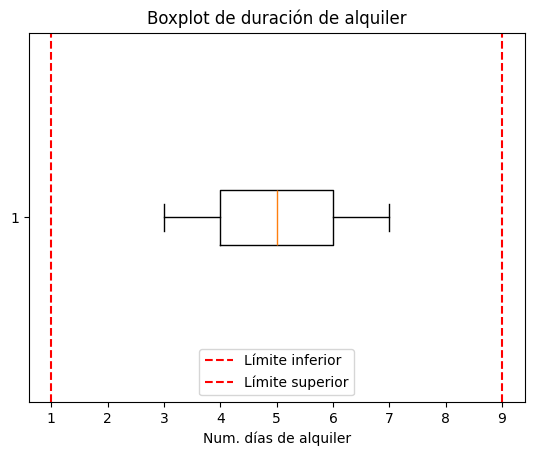

In [39]:
# Boxplot horizontal
plt.boxplot(df_copy['rental_duration'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Num. días de alquiler")
plt.title("Boxplot de duración de alquiler")
plt.legend()
plt.show()

##### No se observa ningún outlier en este campo, ya que el límite inferior del boxplot se sitúa en 1. Esto implica que, para que existiera un valor por debajo de dicho límite, sería necesario que alguien alquilara la película por menos de un día, algo que no es posible en este conjunto de datos.
##### Por otro lado, el límite superior se encuentra en 9 días, un valor relativamente alto para la duración del alquiler de una película, por lo que es poco probable encontrar registros que superen este valor.
##### En consecuencia, no se detectan outliers y, por lo tanto, no hay valores que alteren las estadísticas previamente analizadas.

# Creación de columnas derivadas

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 1 to 1000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             958 non-null    object 
 1   film_duration     958 non-null    int64  
 2   description       958 non-null    object 
 3   special_features  958 non-null    object 
 4   rating            958 non-null    object 
 5   rental_duration   958 non-null    int64  
 6   rental_rate       958 non-null    float64
 7   replacement_cost  958 non-null    float64
 8   language          958 non-null    object 
 9   category          958 non-null    object 
 10  total_copies      958 non-null    int64  
 11  is_long_film      958 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 97.3+ KB


##### Desde SQL Workbench hemos creado dos nuevas columnas para nuestro dataframe: total_copies e is_long_film.
##### La columna total_copies indica el número total de copias disponibles de cada película. Esta información permite analizar la disponibilidad del catálogo, así como identificar cuáles son las películas más alquiladas y cuáles tienen menor demanda en relación con su número de copias.
##### Por otro lado, la columna derivada is_long_film señala si una película tiene una duración superior a 120 minutos. Gracias a este campo es posible analizar qué duraciones son más populares entre los clientes y, a partir de ello, decidir qué tipo de películas sería conveniente añadir al catálogo, especialmente si se combina con información sobre las categorías más vistas o que generan mayor interés entre los usuarios.

# Columna derivada "price_per_day"

##### Representa el precio de alquiler por día de cada película.

##### Permite identificar qué películas son más caras proporcionalmente a su duración.

##### Por ejemplo, una película con alquiler de 4.99 por 2 días tendría price_per_day = 2.50, mientras que otra de 0.99 por 1 día tendría price_per_day = 0.99.

##### Esta información ayuda a analizar la estrategia de precios y a comparar películas de distinta duración.

In [41]:
df_copy['price_per_day'] = (df_copy['rental_rate'] / df_copy['rental_duration']).round(2)


# Columna derivada "cost_ratio"

##### Mide la relación entre el coste de reemplazo y el precio de alquiler: replacement_cost / rental_rate.

##### Indica cuánto “cuesta reemplazar” la película en relación a lo que genera por alquiler.

##### Un valor alto sugiere que la película es cara de reemplazar en comparación con lo que genera al alquilarse, mientras que un valor bajo indica buena relación entre coste y potencial ingreso.

##### Esto puede ayudar a tomar decisiones sobre qué películas mantener, promocionar o reponer más rápido.

In [42]:
df_copy['cost_ratio'] = (df_copy['replacement_cost'] / df_copy['rental_rate']).round(2)


In [43]:
df_copy

,title,film_duration,description,special_features,rating,rental_duration,rental_rate,replacement_cost,language,category,total_copies,is_long_film,price_per_day,cost_ratio
film_id,,,,,,,,,,,,,,
1,academy dinosaur,86,a epic drama of a feminist and a mad scientist...,"deleted scenes,behind the scenes",PG,6,0.99,20.99,english,documentary,8,no,0.16,21.20
2,ace goldfinger,48,a astounding epistle of a database administrat...,"trailers,deleted scenes",G,3,4.99,12.99,english,horror,3,no,1.66,2.60
3,adaptation holes,50,a astounding reflection of a lumberjack and a ...,"trailers,deleted scenes",NC-17,7,2.99,18.99,english,documentary,4,no,0.43,6.35
4,affair prejudice,117,a fanciful documentary of a frisbee and a lumb...,"commentaries,behind the scenes",G,5,2.99,26.99,english,horror,7,no,0.60,9.03
5,african egg,130,a fast-paced documentary of a pastry chef and ...,deleted scenes,G,6,2.99,22.99,english,family,3,yes,0.50,7.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,young language,183,a unbelieveable yarn of a boat and a database ...,"trailers,behind the scenes",G,6,0.99,9.99,english,documentary,2,yes,0.16,10.09
997,youth kick,179,a touching drama of a teacher and a cat who mu...,"trailers,behind the scenes",NC-17,4,0.99,14.99,english,music,2,yes,0.25,15.14
998,zhivago core,105,a fateful yarn of a composer and a man who mus...,deleted scenes,NC-17,6,0.99,10.99,english,horror,2,no,0.16,11.10


# Exportar dataset final en formato .csv

In [44]:
df_copy.to_csv("..\\catalogo_peliculas_clean.csv", index=False)